# PURPOSE

AUTOMATE long term golden and death cross in a large number of
ASX stocks - use 200 and 20 day moving averages on a weekly chart. Get this script to run every saturday and then send me an email if there are any updates to consider for the next week.

This will start with an array of stocks to analyse (20) and build up to 250.




In [2]:
# Import all the libraries
import yfinance as yf
import pandas as pd
import numpy as np
from email.message import EmailMessage
import smtplib
from google.colab import userdata

!pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [3]:
# Create a list of stock tickers
tickers = [
    'A1M.AX', 'A2M.AX', 'A4N.AX', 'AAT.AX', 'AAV.AX', 'ABG.AX', 'ABP.AX', 'ACX.AX', 'ADH.AX', 'ADJ.AX',
    'AD8.AX', 'AEF.AX', 'AFG.AX', 'AFI.AX', 'AFL.AX', 'AFS.AX', 'AFT.AX', 'AIA.AX', 'ALD.AX', 'ALL.AX',
    'ALQ.AX', 'ALU.AX', 'ALX.AX', 'AMC.AX', 'AMP.AX', 'ANG.AX', 'ANZ.AX', 'APA.AX', 'APE.AX', 'APM.AX',
    'APO.AX', 'APS.AX', 'APT.AX', 'APX.AX', 'ARB.AX', 'ARG.AX', 'ARL.AX', 'ARU.AX', 'ASB.AX', 'ASS.AX',
    'AST.AX', 'ASX.AX', 'AUB.AX', 'AVE.AX', 'AVJ.AX', 'AVN.AX', 'AVP.AX', 'AVA.AX', 'AVZ.AX', 'AWC.AX',
    'AWV.AX', 'AWR.AX', 'AX1.AX', 'AXL.AX', 'AZL.AX', 'AZJ.AX', 'BAP.AX', 'BAR.AX', 'BBL.AX', 'BDR.AX',
    'BEN.AX', 'BER.AX', 'BGA.AX', 'BG8.AX', 'BHP.AX', 'BIG.AX', 'BKI.AX', 'BKL.AX', 'BKW.AX', 'BLD.AX',
    'BLS.AX', 'BME.AX', 'BOE.AX', 'BOL.AX', 'BOT.AX', 'BOQ.AX', 'BPS.AX', 'BPT.AX', 'BRG.AX', 'BRN.AX',
    'BSL.AX', 'BTT.AX', 'BWP.AX', 'BXB.AX', 'BYE.AX', 'CAJ.AX', 'CAL.AX', 'CAV.AX', 'CAR.AX', 'CBA.AX',
    'CBL.AX', 'CCL.AX', 'CCP.AX', 'CCT.AX', 'CDA.AX', 'CDP.AX', 'CEN.AX', 'CGF.AX', 'CGO.AX', 'CGR.AX',
    'CHC.AX', 'CHM.AX', 'CHN.AX', 'CIM.AX', 'CIP.AX', 'CKS.AX', 'CKF.AX', 'CL1.AX', 'CLW.AX', 'CMA.AX',
    'CMM.AX', 'CMW.AX', 'CNU.AX', 'COB.AX', 'COE.AX', 'COF.AX', 'COH.AX', 'COL.AX', 'COM.AX', 'CPU.AX',
    'CQR.AX', 'CRA.AX', 'CRN.AX', 'CRZ.AX', 'CSL.AX', 'CSR.AX', 'CTD.AX', 'CTX.AX', 'CUC.AX', 'CUV.AX',
    'CWN.AX', 'CWY.AX', 'DCN.AX', 'DEG.AX', 'DGL.AX', 'DHG.AX', 'DMP.AX', 'DOW.AX', 'DRR.AX', 'DSK.AX',
    'DUI.AX', 'DVL.AX', 'DXI.AX', 'DXS.AX', 'EBO.AX', 'EGR.AX', 'EGR.AX', 'EHL.AX', 'ELD.AX', 'ELL.AX',
    'EML.AX', 'EPR.AX', 'EQT.AX', 'ETH.AX', 'EUA.AX', 'EVN.AX', 'EVT.AX', 'FBU.AX', 'FCT.AX', 'FDC.AX',
    'FGG.AX', 'FGH.AX', 'FMG.AX', 'FNV.AX', 'FPH.AX', 'FPO.AX', 'FRE.AX', 'FXJ.AX', 'GCI.AX', 'GDI.AX',
    'GEM.AX', 'GJT.AX', 'GL1.AX', 'GMA.AX', 'GMG.AX', 'GNC.AX', 'GNE.AX', 'GOZ.AX', 'GPT.AX', 'GUD.AX',
    'GWA.AX', 'GXL.AX', 'HACK.AX', 'HAR.AX', 'HBL.AX', 'HLS.AX', 'HPI.AX', 'HUB.AX', 'HVN.AX', 'HXD.AX',
    'IAG.AX', 'IBD.AX', 'ICP.AX', 'ICU.AX', 'IDP.AX', 'IEL.AX', 'IFL.AX', 'IFT.AX', 'IGO.AX', 'ILM.AX',
    'ILU.AX', 'IMD.AX', 'INR.AX', 'IOP.AX', 'IOP.AX', 'IPA.AX', 'IPL.AX', 'IRE.AX', 'ISX.AX', 'ITD.AX',
    'IVZ.AX', 'JBH.AX', 'JHX.AX', 'KCN.AX', 'KGN.AX', 'KMD.AX', 'LAD.AX', 'LAS.AX', 'LCL.AX', 'LFS.AX',
    'LGI.AX', 'LHC.AX', 'LIC.AX', 'LND.AX', 'LNK.AX', 'LSF.AX', 'LTR.AX', 'LYC.AX', 'MAH.AX', 'MAP.AX',
    'MCY.AX', 'MEZ.AX', 'MFF.AX', 'MFG.AX', 'MGF.AX', 'MGR.AX', 'MIN.AX', 'MKL.AX', 'MLT.AX', 'MNF.AX',
    'MOQ.AX', 'MP1.AX', 'MPL.AX', 'MQG.AX', 'MSB.AX', 'MSL.AX', 'MTO.AX', 'MTS.AX', 'NAB.AX', 'NAN.AX',
    'NCM.AX', 'NEC.AX', 'NFG.AX', 'NHF.AX', 'NIC.AX', 'NSR.AX', 'NST.AX', 'NUF.AX', 'NWL.AX', 'NXT.AX',
    'OHE.AX', 'OML.AX', 'ORA.AX', 'ORG.AX', 'ORI.AX', 'OSH.AX', 'OVN.AX', 'OZL.AX', 'PAL.AX', 'PBH.AX',
    'PDL.AX', 'PFG.AX', 'PGG.AX', 'PGH.AX', 'PHL.AX', 'PIL.AX', 'PLS.AX', 'PME.AX', 'PMV.AX', 'PNI.AX',
    'PNV.AX', 'PPT.AX', 'PRN.AX', 'PTM.AX', 'PWN.AX', 'QAN.AX', 'QBE.AX', 'QUB.AX', 'RAM.AX', 'REA.AX',
    'REH.AX', 'RHC.AX', 'RIO.AX', 'RKN.AX', 'RMD.AX', 'RRL.AX', 'RSG.AX', 'RWC.AX', 'S32.AX', 'SAR.AX',
    'SCG.AX', 'SCP.AX', 'SDF.AX', 'SEK.AX', 'SGR.AX', 'SGT.AX', 'SHL.AX', 'SIO.AX', 'SIR.AX', 'SKC.AX',
    'SLK.AX', 'SOL.AX', 'SPK.AX', 'SRV.AX', 'SST.AX', 'STO.AX', 'STP.AX', 'SUL.AX', 'SUN.AX', 'SVW.AX',
    'SYD.AX', 'TAH.AX', 'TCL.AX', 'TGR.AX', 'TLS.AX', 'TLT.AX', 'TNE.AX', 'TPG.AX', 'TPW.AX', 'TWE.AX',
    'TYR.AX', 'VAP.AX', 'VGI.AX', 'VGR.AX', 'VGS.AX', 'VNT.AX', 'VUL.AX', 'VVR.AX', 'WBC.AX', 'WDS.AX',
    'WEB.AX', 'WES.AX', 'WFD.AX', 'WHA.AX', 'WPL.AX', 'WPR.AX', 'WOW.AX', 'WTC.AX', 'XRO.AX', 'YAL.AX',
    'ZEL.AX', 'ZIM.AX'
]

# Create an empty dictionary to store the dataframes
stock_data = {}

for ticker in tickers:
    try:
        # Download data for a single ticker with all columns
        data = yf.download(ticker, period='8y', interval='1wk', auto_adjust=False)

        # Check if the dataframe is empty
        if data.empty:
            print(f"No data found for {ticker}. Skipping.")
            continue

        # Add the data to the dictionary
        stock_data[ticker] = data
        print(f"Successfully downloaded data for {ticker}.")
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}. Skipping.")

print("Finished downloading all data.")

[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for A1M.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for A2M.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for A4N.AX.
No data found for AAT.AX. Skipping.


ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: AAV.AX"}}}
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAV.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AAV.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ABG.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ABP.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ACX.AX.
Successfully downloaded data for ADH.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADJ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ADJ.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AD8.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AEF.AX.
Successfully downloaded data for AFG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AFI.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for AFL.AX.
No data found for AFS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AFT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AIA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ALD.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ALL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ALQ.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALU.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ALU.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ALX.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AMC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AMP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ANG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ANZ.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for APA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for APE.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for APM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for APO.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for APS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed

No data found for APT.AX. Skipping.


Successfully downloaded data for APX.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ARB.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ARG.AX.
Successfully downloaded data for ARL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ARU.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ASB.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ASS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AST.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AST.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ASX.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AUB.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AVE.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVJ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AVJ.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVN.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AVN.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for AVP.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AVA.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVZ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AVZ.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AWC.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AWC.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AWV.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AWV.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AWR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for AWR.AX. Skipping.
Successfully downloaded data for AX1.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AXL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AZL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for AZL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AZJ.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BAP.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BAR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BBL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BDR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BDR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BER.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for BEN.AX.
No data found for BER.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BGA.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BG8.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BG8.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BHP.AX.
Successfully downloaded data for BIG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BKI.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BKL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKW.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BKW.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BLD.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BLS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BME.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for BME.AX. Skipping.
Successfully downloaded data for BOE.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BOL.AX.
Successfully downloaded data for BOT.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BPS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for BOQ.AX.
No data found for BPS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BPT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BRG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BRN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BSL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BTT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for BTT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BWP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for BXB.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BYE.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for BYE.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAJ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for CAJ.AX. Skipping.
No data found for CAL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CAV.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CAR.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CBA.AX.
Successfully downloaded data for CBL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CCL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CCP.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CCT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CDA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CDP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CEN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CGF.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CGO.AX.
Successfully downloaded data for CGR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CHC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CHM.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CHN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CIM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CIP.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CKS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')
[*********************100%***********************]  1 of 1 completed

No data found for CKS.AX. Skipping.


Successfully downloaded data for CKF.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CL1.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CL1.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CLW.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CMA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CMM.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CMW.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CNU.AX.
Successfully downloaded data for COB.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COE.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for COE.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for COF.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for COH.AX.
Successfully downloaded data for COL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for COM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CPU.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CQR.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CRA.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for CRA.AX. Skipping.
Successfully downloaded data for CRN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CRZ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for CRZ.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CSL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CSR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CTD.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTX.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CTX.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CUC.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CUC.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CUV.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWN.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for CWN.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for CWY.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DCN.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for DCN.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DEG.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for DEG.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DGL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DHG.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for DHG.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DMP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DOW.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DRR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DSK.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DUI.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DVL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DXI.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for DXS.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EBO.AX.
Successfully downloaded data for EGR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EGR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EHL.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ELL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for ELD.AX.
No data found for ELL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EML.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EPR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for EPR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EQT.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ETH.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ETH.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EUA.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for EUA.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EVN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EVT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FBU.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDC.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for FCT.AX.
No data found for FDC.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FGG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FGH.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FMG.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FNV.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for FNV.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FPH.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FPO.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for FPO.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FRE.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for FXJ.AX.
Successfully downloaded data for GCI.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GDI.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GEM.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GJT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for GJT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GL1.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GMA.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for GMA.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GMG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GNC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GNE.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GOZ.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GPT.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GUD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for GUD.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GWA.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GXL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for GXL.AX. Skipping.
Successfully downloaded data for HACK.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HBL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for HAR.AX.
No data found for HBL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for HLS.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HPI.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for HPI.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for HUB.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for HVN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HXD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for HXD.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IAG.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IBD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ICP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for IBD.AX. Skipping.
No data found for ICP.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ICU.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IDP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for IDP.AX. Skipping.
Successfully downloaded data for IEL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IFL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IFT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IGO.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ILM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ILM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ILU.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IMD.AX.
Successfully downloaded data for INR.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IOP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for IOP.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IOP.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IPA.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for IOP.AX. Skipping.
No data found for IPA.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IPL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for IPL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for IRE.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ISX.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ISX.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ITD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed

No data found for ITD.AX. Skipping.


Successfully downloaded data for IVZ.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for JBH.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for JHX.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for KCN.AX.
Successfully downloaded data for KGN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for KMD.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LAD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LAS.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for LAD.AX. Skipping.
No data found for LAS.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for LCL.AX.
Successfully downloaded data for LFS.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for LGI.AX.
Successfully downloaded data for LHC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for LIC.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LND.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for LND.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LNK.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for LNK.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for LSF.AX.
Successfully downloaded data for LTR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for LYC.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MAH.AX.
Successfully downloaded data for MAP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MCY.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MEZ.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MFF.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MFG.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MGF.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MGF.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MGR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MIN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MKL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MKL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MLT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MLT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNF.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MNF.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOQ.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MOQ.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MP1.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MPL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MQG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MSB.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for MSL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MTO.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for MTS.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NAB.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NAN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NCM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for NCM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFG.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


Successfully downloaded data for NEC.AX.
No data found for NFG.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NHF.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NIC.AX.
Successfully downloaded data for NSR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NST.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NUF.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NWL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for NXT.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OHE.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for OHE.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for OML.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ORA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ORG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ORI.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OSH.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for OSH.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OVN.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for OVN.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OZL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for OZL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PAL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for PAL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PBH.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PDL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for PDL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PFG.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PGG.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for PGG.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PGH.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for PGH.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PHL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


No data found for PHL.AX. Skipping.
Successfully downloaded data for PIL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PLS.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PME.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PMV.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PNI.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PNV.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PPT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PRN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PTM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for PTM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for PWN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for QAN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for QBE.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for QUB.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAM.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for RAM.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for REA.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for REH.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RHC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RIO.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RKN.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RMD.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RRL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RSG.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RWC.AX.
Successfully downloaded data for S32.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SAR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for SAR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SCG.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SCP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SDF.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SEK.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SGR.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for SGT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SHL.AX.
Successfully downloaded data for SIO.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for SIR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SKC.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SLK.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for SLK.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SOL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SPK.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SRV.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SST.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for STO.AX.
Successfully downloaded data for STP.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SUL.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for SUN.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SVW.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for SVW.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYD.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for SYD.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TAH.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TCL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TGR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for TGR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TLS.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TLT.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for TLT.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TNE.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TPG.AX.
Successfully downloaded data for TPW.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for TWE.AX.
Successfully downloaded data for TYR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for VAP.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VGI.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VGR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y)')


No data found for VGI.AX. Skipping.
No data found for VGR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for VGS.AX.
Successfully downloaded data for VNT.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for VUL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VVR.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for VVR.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WBC.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WDS.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WEB.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WES.AX.
Successfully downloaded data for WFD.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WHA.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for WHA.AX. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WPL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for WPL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WPR.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WOW.AX.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for WTC.AX.
Successfully downloaded data for XRO.AX.


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for YAL.AX.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZEL.AX']: YFPricesMissingError('possibly delisted; no price data found  (period=8y) (Yahoo error = "No data found, symbol may be delisted")')


No data found for ZEL.AX. Skipping.


[*********************100%***********************]  1 of 1 completed

Successfully downloaded data for ZIM.AX.
Finished downloading all data.


In [4]:
# --- Step 2: Clean and Prepare Data ---
print("\n--- Starting Data Cleaning ---")
cleaned_data = {}
for ticker, data in stock_data.items():

    # Use a try...except block to handle potential formatting errors
    try:
        # Step 1: Handle Multi-Level Columns
        # This will remove the 'Price' and 'Ticker' levels
        data.columns = data.columns.droplevel(level=1)
        data.columns = data.columns.droplevel(level=2)
    except IndexError:
        # If there's no multi-level index, the droplevel will fail, which is okay.
        pass

    # Step 2: Reset the index to make 'Date' a column
    data = data.reset_index()

    # Step 3: Rename Columns for Consistency
    # We rename 'Adj Close' to 'Close' for consistent analysis
    data = data.rename(columns={'Adj Close': 'Close'})

    # Store the cleaned data in a new dictionary
    cleaned_data[ticker] = data

print("--- Finished Data Cleaning ---")


--- Starting Data Cleaning ---
--- Finished Data Cleaning ---


In [15]:
# Print the head and tail of a specific stock to inspect the data

try:
    print("\n--- Displaying data for XRO.AX ---")
    print("\nHead of DataFrame:")
    print(stock_data['XRO.AX'].head())

    print("\nTail of DataFrame:")
    print(stock_data['XRO.AX'].tail())

except KeyError:
    print("\nXRO.AX data was not found in the dictionary.")


--- Displaying data for XRO.AX ---

Head of DataFrame:
Price       Adj Close      Close       High        Low       Open   Volume
Date                                                                      
2018-01-15  29.950001  29.950001  31.129999  29.809999  30.100000   748225
2018-01-22  31.700001  31.700001  31.799999  29.799999  29.900000   640276
2018-01-29  33.490002  33.490002  35.490002  29.360001  31.820000  1830884
2018-02-05  31.770000  31.770000  32.900002  29.809999  32.549999  1728762
2018-02-12  32.099998  32.099998  32.950001  30.600000  31.760000  2686739

Tail of DataFrame:
Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2025-12-15  115.639999  115.639999  117.419998  108.199997  112.250000   
2025-12-22  112.779999  112.779999  117.769997  112.419998  116.839996   
2025-12-29  112.250000  112.250000  114.800003  112.000000  113.680000   
2026-01-05  107.459999  107.4

In [6]:
# NEW STEP: List the tickers being analyzed
print("--- Tickers to be Analyzed ---")
print(tickers)
print("------------------------------")


--- Tickers to be Analyzed ---
['A1M.AX', 'A2M.AX', 'A4N.AX', 'AAT.AX', 'AAV.AX', 'ABG.AX', 'ABP.AX', 'ACX.AX', 'ADH.AX', 'ADJ.AX', 'AD8.AX', 'AEF.AX', 'AFG.AX', 'AFI.AX', 'AFL.AX', 'AFS.AX', 'AFT.AX', 'AIA.AX', 'ALD.AX', 'ALL.AX', 'ALQ.AX', 'ALU.AX', 'ALX.AX', 'AMC.AX', 'AMP.AX', 'ANG.AX', 'ANZ.AX', 'APA.AX', 'APE.AX', 'APM.AX', 'APO.AX', 'APS.AX', 'APT.AX', 'APX.AX', 'ARB.AX', 'ARG.AX', 'ARL.AX', 'ARU.AX', 'ASB.AX', 'ASS.AX', 'AST.AX', 'ASX.AX', 'AUB.AX', 'AVE.AX', 'AVJ.AX', 'AVN.AX', 'AVP.AX', 'AVA.AX', 'AVZ.AX', 'AWC.AX', 'AWV.AX', 'AWR.AX', 'AX1.AX', 'AXL.AX', 'AZL.AX', 'AZJ.AX', 'BAP.AX', 'BAR.AX', 'BBL.AX', 'BDR.AX', 'BEN.AX', 'BER.AX', 'BGA.AX', 'BG8.AX', 'BHP.AX', 'BIG.AX', 'BKI.AX', 'BKL.AX', 'BKW.AX', 'BLD.AX', 'BLS.AX', 'BME.AX', 'BOE.AX', 'BOL.AX', 'BOT.AX', 'BOQ.AX', 'BPS.AX', 'BPT.AX', 'BRG.AX', 'BRN.AX', 'BSL.AX', 'BTT.AX', 'BWP.AX', 'BXB.AX', 'BYE.AX', 'CAJ.AX', 'CAL.AX', 'CAV.AX', 'CAR.AX', 'CBA.AX', 'CBL.AX', 'CCL.AX', 'CCP.AX', 'CCT.AX', 'CDA.AX', 'CDP.AX', 'CEN.AX'

In [29]:
# --- Step 2: Analyze Each Stock and Generate Alerts ---
print("\n--- Starting Analysis ---")
for ticker, data in stock_data.items():
    print(f"\nAnalyzing {ticker}...")

    # *** FIX: Flatten the index to avoid KeyErrors ***
    # This ensures a simple numeric index for all operations.
    try:
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index(level=0, drop=True)
        data = data.reset_index()
    except Exception as e:
        print(f"Error resetting index for {ticker}: {e}. Skipping.")
        continue

    # Ensure the dataframe has enough data for the 200-week MA
    if len(data) < 60:
        print(f"Not enough data for {ticker} for the 200-week MA. Skipping.")
        continue

    # Using a 5-week (Short) and 55-week (Long) Golden Cross strategy
    data['SMA_Short'] = data['Close'].rolling(window=5).mean()
    data['SMA_Long'] = data['Close'].rolling(window=55).mean()

#    Create Crossover Signals based on these new names
    data.loc[(data['SMA_Short'].shift(1) < data['SMA_Long'].shift(1)) & (data['SMA_Short'] > data['SMA_Long']), 'Signal'] = 1


    # Calculate Moving Averages
    #data['SMA20'] = data['Close'].rolling(window=15).mean()
    #data['SMA200'] = data['Close'].rolling(window=60).mean()

    # Create Crossover Signals
    #data['Signal'] = 0.0
    #data.loc[(data['SMA20'].shift(1) < data['SMA200'].shift(1)) & (data['SMA20'] > data['SMA200']), 'Signal'] = 1
    #data.loc[(data['SMA20'].shift(1) > data['SMA200'].shift(1)) & (data['SMA20'] < data['SMA200']), 'Signal'] = -1

    # Create Bearish and Bullish Engulfing Signals
    if 'Open' in data.columns and 'Close' in data.columns:
        data['EngulfingSignal'] = 0.0

        # Bearish Engulfing
        prev_bullish = data['Close'].shift(1) > data['Open'].shift(1)
        curr_bearish = data['Close'] < data['Open']
        engulfs_bearish = (data['Open'] > data['Close'].shift(1)) & (data['Close'] < data['Open'].shift(1))
        data.loc[prev_bullish & curr_bearish & engulfs_bearish, 'EngulfingSignal'] = -1

        # Bullish Engulfing
        prev_bearish = data['Close'].shift(1) < data['Open'].shift(1)
        curr_bullish = data['Close'] > data['Open']
        engulfs_bullish = (data['Open'] < data['Close'].shift(1)) & (data['Close'] > data['Open'].shift(1))
        data.loc[prev_bearish & curr_bullish & engulfs_bullish, 'EngulfingSignal'] = 1

    # Combine Signals for a Confirmed Alert
    if 'EngulfingSignal' in data.columns:
        data['CombinedSignal'] = 0.0
        data.loc[(data['Signal'] == -1) & (data['EngulfingSignal'] == -1), 'CombinedSignal'] = -1
        data.loc[(data['Signal'] == 1) & (data['EngulfingSignal'] == 1), 'CombinedSignal'] = 1

    # --- NEW FEATURE: Find and print the last confirmed signal ---
    # reverse the DataFrame and find the first non-zero signal
    signals_found = data[data['CombinedSignal'] != 0]
    if not signals_found.empty:
        last_signal_data = signals_found.iloc[-1]
        last_signal_date = last_signal_data['Date'].strftime('%Y-%m-%d')
        last_signal_type = "Buy" if last_signal_data['CombinedSignal'] == 1 else "Sell"
        print(f"The last confirmed signal for {ticker} was a {last_signal_type} signal on {last_signal_date}.")
    else:
        print(f"No confirmed signals found in the history of {ticker}.")

    # Check for an alert on the last row
    last_row = data.iloc[-1]

    if 'CombinedSignal' in data.columns and last_row['CombinedSignal'] != 0.0:
        signal_type = "Buy" if last_row['CombinedSignal'] == 1 else "Sell"
        alert_body = f"A confirmed {signal_type} signal has been detected for {ticker} as of {last_row['Date'].strftime('%Y-%m-%d')}."
        print(alert_body)

        # Uncomment the line below to send the email
        # send_notification(f"Confirmed {signal_type} Signal for {ticker}", alert_body)
    else:
        print(f"No new confirmed signal detected for {ticker}.")

            # At the end of the loop, add this conditional statement
    if ticker == 'BHP.AX':
        print(f"\n--- Final DataFrame for {ticker} ---")
        print(data.head(200))
        print("---------------------------------")

    print("-----------------------------------")

print("\n--- Analysis Complete! ---")


--- Starting Analysis ---

Analyzing A1M.AX...
No confirmed signals found in the history of A1M.AX.
No new confirmed signal detected for A1M.AX.
-----------------------------------

Analyzing A2M.AX...
No confirmed signals found in the history of A2M.AX.
No new confirmed signal detected for A2M.AX.
-----------------------------------

Analyzing A4N.AX...
No confirmed signals found in the history of A4N.AX.
No new confirmed signal detected for A4N.AX.
-----------------------------------

Analyzing ABG.AX...
No confirmed signals found in the history of ABG.AX.
No new confirmed signal detected for ABG.AX.
-----------------------------------

Analyzing ACX.AX...
Not enough data for ACX.AX for the 200-week MA. Skipping.

Analyzing ADH.AX...
No confirmed signals found in the history of ADH.AX.
No new confirmed signal detected for ADH.AX.
-----------------------------------

Analyzing AD8.AX...
No confirmed signals found in the history of AD8.AX.
No new confirmed signal detected for AD8.AX.


When you want to inspect a stock in more detail - use the below.

In [30]:
ticker_to_plot = 'BHP.AX'

print(data.tail())


Price       Date  Adj Close      Close       High        Low       Open  \
413   2025-12-15  20.400000  20.400000  20.600000  18.100000  18.100000   
414   2025-12-22  24.049999  24.049999  24.830000  20.299999  20.410000   
415   2025-12-29  23.000000  23.000000  25.600000  22.650000  24.600000   
416   2026-01-05  23.450001  23.450001  24.790001  22.600000  23.150000   
417   2026-01-12  23.000000  23.000000  24.440001  22.799999  23.450001   

Price  Volume  SMA_Short   SMA_Long  Signal  EngulfingSignal  CombinedSignal  
413    210013     18.126  14.865091     NaN              0.0             0.0  
414    238659     19.536  15.047818     NaN              0.0             0.0  
415    180300     20.686  15.211455     NaN              0.0             0.0  
416    181398     21.764  15.415818     NaN              0.0             0.0  
417    213567     22.780  15.598364     NaN              0.0             0.0  


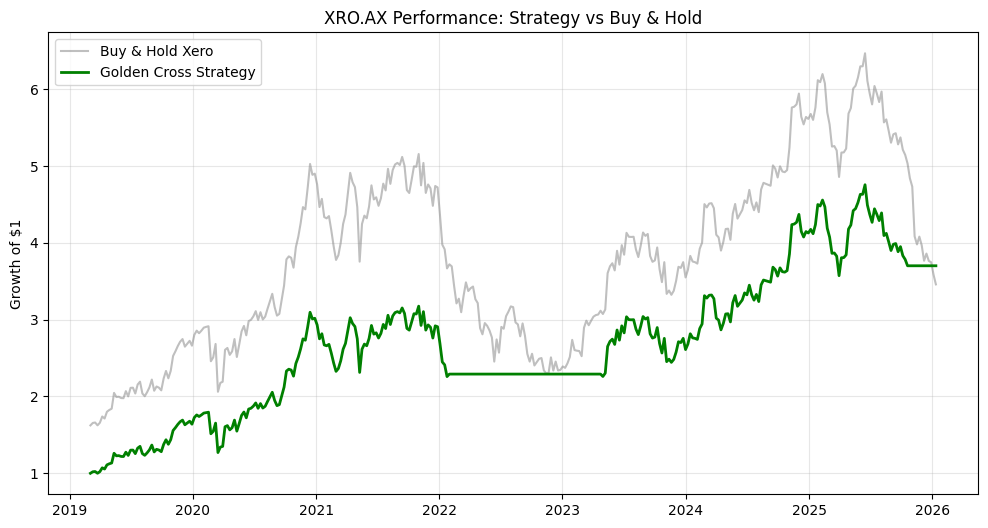

Xero Strategy Final Return: 270.24%
Xero Buy & Hold Return: 246.01%


In [31]:
# --- REUSABLE SIGNAL FUNCTION ---
def apply_strategy_logic(df):
    # 1. Ensure 'Date' is a column if it's currently the index
    if 'Date' not in df.columns:
        df = df.reset_index()

    # 2. Fix potential Multi-Index columns (common in new yfinance)
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    # 3. Calculate MAs
    # Note: Weekly intervals, so 15 weeks (~4 months) and 60 weeks (~1 year)
    df['SMA20'] = df['Close'].rolling(window=15).mean()
    df['SMA200'] = df['Close'].rolling(window=60).mean()

    # 4. Generate Crossover Signal
    df['Signal'] = 0.0
    # 1.0 when SMA20 is above SMA200 (Bullish), 0.0 otherwise
    df['Signal'] = np.where(df['SMA20'] > df['SMA200'], 1.0, 0.0)

    # 5. Calculate Returns
    df['Market_Return'] = df['Close'].pct_change()
    # Shift position by 1 day so we trade on the NEXT opening
    df['Strategy_Return'] = df['Signal'].shift(1) * df['Market_Return']

    # 6. Calculate Cumulative Growth
    df['Cumulative_Market'] = (1 + df['Market_Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return']).cumprod()

    return df

# --- XERO EVALUATION ---
ticker_to_test = 'XRO.AX'

if ticker_to_test in stock_data:
    # Get fresh copy
    xero_df = stock_data[ticker_to_test].copy()
    xero_df = apply_strategy_logic(xero_df)

    # Remove rows with NaN from the moving averages to start the plot cleanly
    xero_df = xero_df.dropna(subset=['SMA200'])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))

    # We use .values if 'Date' is giving issues, but the reset_index above should fix it
    plt.plot(xero_df['Date'], xero_df['Cumulative_Market'], label='Buy & Hold Xero', color='gray', alpha=0.5)
    plt.plot(xero_df['Date'], xero_df['Cumulative_Strategy'], label='Golden Cross Strategy', color='green', linewidth=2)

    plt.title(f"{ticker_to_test} Performance: Strategy vs Buy & Hold")
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    final_strategy = (xero_df['Cumulative_Strategy'].iloc[-1] - 1) * 100
    final_market = (xero_df['Cumulative_Market'].iloc[-1] - 1) * 100
    print(f"Xero Strategy Final Return: {final_strategy:.2f}%")
    print(f"Xero Buy & Hold Return: {final_market:.2f}%")

In [32]:
# Look for the raw crossovers (SMA 5 > SMA 55)
crossovers = xero_df[xero_df['Signal'] != 0]

if not crossovers.empty:
    print("--- 5/55 Crossover Events for Xero ---")
    print(crossovers[['Date', 'Close', 'Signal']])
else:
    print("Still no crossovers found. Check if SMA_Short and SMA_Long are being calculated correctly.")

--- 5/55 Crossover Events for Xero ---
Price       Date       Close  Signal
59    2019-03-04   48.630001     1.0
60    2019-03-11   49.580002     1.0
61    2019-03-18   49.750000     1.0
62    2019-03-25   48.650002     1.0
63    2019-04-01   49.660000     1.0
..           ...         ...     ...
400   2025-09-15  162.589996     1.0
401   2025-09-22  158.240005     1.0
402   2025-09-29  160.949997     1.0
403   2025-10-06  156.149994     1.0
404   2025-10-13  154.149994     1.0

[282 rows x 3 columns]


[*********************100%***********************]  1 of 1 completed


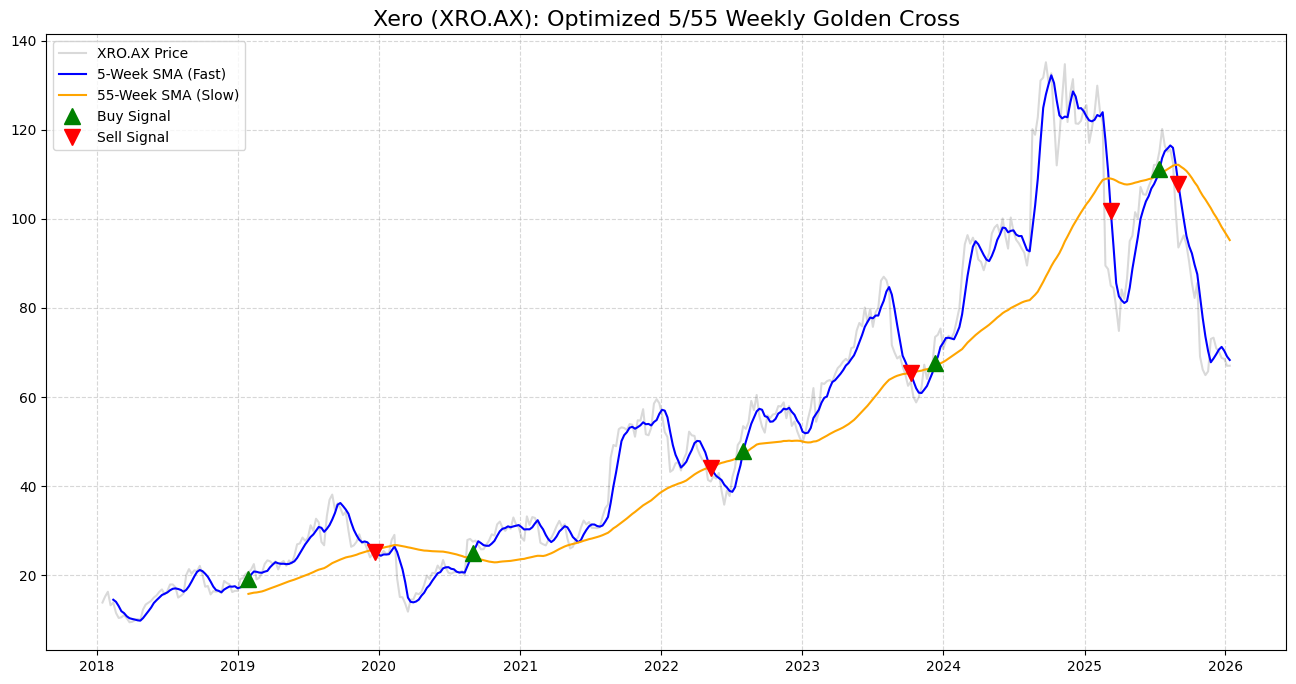

Current Strategy Position: SELL/CASH


In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Download & Clean fresh data
ticker = 'XRO.AX'
data = yf.download(ticker, period='8y', interval='1wk', auto_adjust=False)

# Flatten columns (yfinance fix)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)
data = data.reset_index()

# 2. Strategy Logic (5/55 Weekly)
data['SMA_Short'] = data['Close'].rolling(window=5).mean()
data['SMA_Long'] = data['Close'].rolling(window=55).mean()

# Position: 1 if Short > Long, else 0
data['Signal'] = np.where(data['SMA_Short'] > data['SMA_Long'], 1.0, 0.0)
data['Action'] = data['Signal'].diff()

# 3. Create the Visualization
plt.figure(figsize=(16, 8))

# Plot Price and Averages
plt.plot(data['Date'], data['Close'], label='XRO.AX Price', color='black', alpha=0.15)
plt.plot(data['Date'], data['SMA_Short'], label='5-Week SMA (Fast)', color='blue', linewidth=1.5)
plt.plot(data['Date'], data['SMA_Long'], label='55-Week SMA (Slow)', color='orange', linewidth=1.5)

# 4. Plot Arrows
# Buy (Action = 1)
plt.plot(data.loc[data['Action'] == 1, 'Date'],
         data.loc[data['Action'] == 1, 'SMA_Short'],
         '^', markersize=12, color='green', label='Buy Signal', lw=0)

# Sell (Action = -1)
plt.plot(data.loc[data['Action'] == -1, 'Date'],
         data.loc[data['Action'] == -1, 'SMA_Short'],
         'v', markersize=12, color='red', label='Sell Signal', lw=0)

plt.title('Xero (XRO.AX): Optimized 5/55 Weekly Golden Cross', fontsize=16)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# 5. Final Audit Trail
last_action = "BUY" if data['Signal'].iloc[-1] == 1 else "SELL/CASH"
print(f"Current Strategy Position: {last_action}")



---



In [36]:
# --- TRADE LOG GENERATOR ---
# 1. Identify where the signal changes (Entry/Exit points)
xero_df['Trade_Action'] = xero_df['Signal'].diff()

# 2. Filter for only the weeks where a trade occurred
trade_events = xero_df[xero_df['Trade_Action'] != 0].copy()

# 3. Create the Log Table
trade_log = []
for i in range(1, len(trade_events)):
    # If the previous action was 1 (Buy) and current is -1 (Sell)
    if trade_events.iloc[i-1]['Trade_Action'] == 1:
        entry_date = trade_events.iloc[i-1]['Date']
        entry_price = trade_events.iloc[i-1]['Close']
        exit_date = trade_events.iloc[i]['Date']
        exit_price = trade_events.iloc[i]['Close']

        profit_loss = (exit_price / entry_price) - 1

        trade_log.append({
            'Entry Date': entry_date.strftime('%Y-%m-%d'),
            'Exit Date': exit_date.strftime('%Y-%m-%d'),
            'Entry Price': round(entry_price, 2),
            'Exit Price': round(exit_price, 2),
            'P&L %': round(profit_loss * 100, 2)
        })

# 4. Display as a Clean Table
df_log = pd.DataFrame(trade_log)
print("--- XERO STRATEGY TRADE LOG ---")
print(df_log)

# 5. Summary Statistics
print(f"\nTotal Trades: {len(df_log)}")
print(f"Average Profit per Trade: {df_log['P&L %'].mean():.2f}%")
print(f"Best Trade: {df_log['P&L %'].max():.2f}%")

--- XERO STRATEGY TRADE LOG ---
   Entry Date   Exit Date  Entry Price  Exit Price  P&L %
0  2023-04-24  2025-10-20        93.34      150.79  61.55

Total Trades: 1
Average Profit per Trade: 61.55%
Best Trade: 61.55%


In [28]:
def optimize_windows(df, short_range, long_range):
    results = []

    # 1. Clean data once
    df = df.reset_index()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    # 2. Iterate through all combinations
    for s in short_range:
        for l in long_range:
            if s >= l: continue # Short must be shorter than long

            temp_df = df.copy()
            temp_df['S_SMA'] = temp_df['Close'].rolling(window=s).mean()
            temp_df['L_SMA'] = temp_df['Close'].rolling(window=l).mean()

            # Simple Return Logic
            temp_df['Sig'] = np.where(temp_df['S_SMA'] > temp_df['L_SMA'], 1.0, 0.0)
            temp_df['Ret'] = temp_df['Sig'].shift(1) * temp_df['Close'].pct_change()
            final_ret = (1 + temp_df['Ret']).cumprod().iloc[-1]

            results.append({'Short': s, 'Long': l, 'Return': final_ret})

    return pd.DataFrame(results)

# Run the optimizer for Xero
# Testing Short (5 to 15 weeks) and Long (30 to 60 weeks)
opt_results = optimize_windows(stock_data['XRO.AX'], range(5, 16), range(30, 61))

# Find the winner
winner = opt_results.loc[opt_results['Return'].idxmax()]
print(f"BEST WINDOWS: Short={winner['Short']}, Long={winner['Long']} with {winner['Return']:.2f}x growth")

BEST WINDOWS: Short=5.0, Long=55.0 with 5.59x growth


**below is the previous code, dont need to use as all incorporated above.**

In [ ]:
# Define the function for support levels ...

def find_levels(df, tolerance=0.01):
    levels = {}

    # Find local highs and lows using a simple rolling window
    df['is_high'] = (df['High'] == df['High'].rolling(10, center=True).max()).astype(int)
    df['is_low'] = (df['Low'] == df['Low'].rolling(10, center=True).min()).astype(int)

    # Cluster resistance levels
    for price in df[df['is_high'] == 1]['High']:
        found = False
        for level in levels:
            if abs(price - level) / price < tolerance:
                levels[level]['count'] += 1
                found = True
                break
        if not found:
            levels[price] = {'type': 'resistance', 'count': 1}

    # Cluster support levels
    for price in df[df['is_low'] == 1]['Low']:
        found = False
        for level in levels:
            if abs(price - level) / price < tolerance:
                levels[level]['count'] += 1
                found = True
                break
        if not found:
            levels[price] = {'type': 'support', 'count': 1}

    return levels


In [10]:
# Create a new 'EngulfingSignal' column and initialize to 0
data['EngulfingSignal'] = 0.0

# Define the conditions for a bearish engulfing pattern
# Condition 1: Previous candle is bullish (close > open)
prev_bullish = data['Close'].shift(1) > data['Open'].shift(1)

# Condition 2: Current candle is bearish (close < open)
curr_bearish = data['Close'] < data['Open']

# Condition 3: Current candle body engulfs the previous one
engulfs = (data['Open'] > data['Close'].shift(1)) & (data['Close'] < data['Open'].shift(1))

# Apply the conditions to create the signal
data.loc[prev_bullish & curr_bearish & engulfs, 'EngulfingSignal'] = -1

# Print the last few rows to see the new signal column
print(data.tail(10))

Price       Date  Adj Close      Close       High        Low       Open  \
408   2025-11-10  18.440001  18.440001  19.190001  17.844999  17.844999   
409   2025-11-17  17.000000  17.000000  18.639999  16.799999  18.500000   
410   2025-11-24  17.250000  17.250000  18.430000  16.700001  17.020000   
411   2025-12-01  18.059999  18.059999  18.485001  17.209999  17.770000   
412   2025-12-08  17.920000  17.920000  18.389999  17.650000  18.190001   
413   2025-12-15  20.400000  20.400000  20.600000  18.100000  18.100000   
414   2025-12-22  24.049999  24.049999  24.830000  20.299999  20.410000   
415   2025-12-29  23.000000  23.000000  25.600000  22.650000  24.600000   
416   2026-01-05  23.450001  23.450001  24.790001  22.600000  23.150000   
417   2026-01-12  23.000000  23.000000  24.440001  22.799999  23.450001   

Price  Volume      SMA20     SMA200  Signal  EngulfingSignal  CombinedSignal  
408     72107  17.565334  14.676333     0.0              0.0             0.0  
409     76949  1

In [11]:
# Create a new 'CombinedSignal' column
data['CombinedSignal'] = 0.0

# Combine the signals
data.loc[(data['Signal'] == -1) & (data['EngulfingSignal'] == -1), 'CombinedSignal'] = -1

# Now, we check the very last row for a confirmed sell signal
last_row = data.iloc[-1]
if last_row['CombinedSignal'] == -1:
    print("Confirmed Sell Signal Detected!")
    # Here, you would call your email function
    # send_notification("Confirmed Sell", last_row.name.strftime('%Y-%m-%d'))

In [12]:
def find_local_extremes(data, window=10):
    data['is_high'] = (data['High'] == data['High'].rolling(window, center=True).max()).astype(int)
    data['is_low'] = (data['Low'] == data['Low'].rolling(window, center=True).min()).astype(int)
    return data

# Apply the function to your data
data = find_local_extremes(data, window=10)

# Print the last few rows to see the new columns
print(data.tail())

Price       Date  Adj Close      Close       High        Low       Open  \
413   2025-12-15  20.400000  20.400000  20.600000  18.100000  18.100000   
414   2025-12-22  24.049999  24.049999  24.830000  20.299999  20.410000   
415   2025-12-29  23.000000  23.000000  25.600000  22.650000  24.600000   
416   2026-01-05  23.450001  23.450001  24.790001  22.600000  23.150000   
417   2026-01-12  23.000000  23.000000  24.440001  22.799999  23.450001   

Price  Volume      SMA20     SMA200  Signal  EngulfingSignal  CombinedSignal  \
413    210013  18.308667  14.868833     0.0              0.0             0.0   
414    238659  18.847334  15.004167     0.0              0.0             0.0   
415    180300  19.306000  15.130333     0.0              0.0             0.0   
416    181398  19.596000  15.279500     0.0              0.0             0.0   
417    213567  19.861333  15.420667     0.0              0.0             0.0   

Price  is_high  is_low  
413          0       0  
414          0    

In [13]:
# A simple way to find and cluster support/resistance levels
def find_support_resistance(data, price_tolerance=0.01):
    support_levels = {}
    resistance_levels = {}

    for i in range(len(data)):
        # Check for a local high
        if data['is_high'].iloc[i] == 1:
            price = data['High'].iloc[i]
            found = False
            for level in resistance_levels:
                if abs(price - level) / price < price_tolerance:
                    resistance_levels[level] += 1
                    found = True
                    break
            if not found:
                resistance_levels[price] = 1

        # Check for a local low
        if data['is_low'].iloc[i] == 1:
            price = data['Low'].iloc[i]
            found = False
            for level in support_levels:
                if abs(price - level) / price < price_tolerance:
                    support_levels[level] += 1
                    found = True
                    break
            if not found:
                support_levels[price] = 1

    return support_levels, resistance_levels

support_levels, resistance_levels = find_support_resistance(data)
print("Potential Support Levels (count):", support_levels)
print("Potential Resistance Levels (count):", resistance_levels)

Potential Support Levels (count): {np.float64(6.090000152587891): 2, np.float64(5.800000190734863): 1, np.float64(6.0): 4, np.float64(6.230000019073486): 2, np.float64(7.25): 1, np.float64(7.699999809265137): 1, np.float64(10.0): 2, np.float64(6.960000038146973): 1, np.float64(8.399999618530273): 1, np.float64(8.5): 1, np.float64(8.75): 1, np.float64(11.600000381469727): 3, np.float64(20.334999084472656): 1, np.float64(19.5): 1, np.float64(19.229999542236328): 1, np.float64(21.0): 2, np.float64(22.385000228881836): 2, np.float64(21.770000457763672): 1, np.float64(24.600000381469727): 1, np.float64(23.690000534057617): 1, np.float64(23.0): 1, np.float64(19.799999237060547): 1, np.float64(15.989999771118164): 2, np.float64(16.5): 2, np.float64(13.220000267028809): 1, np.float64(13.510000228881836): 1, np.float64(10.4399995803833): 3, np.float64(14.369999885559082): 1, np.float64(16.700000762939453): 1}
Potential Resistance Levels (count): {np.float64(6.699999809265137): 2, np.float64(6.4

In [ ]:
print(data.tail(1))

          Date  Close  High  Low  Open    Volume    SMA20    SMA200  Signal  \
260 2025-09-29    7.1  7.13  6.2  6.45  28941994  5.16215  7.582906     0.0   

     EngulfingSignal  CombinedSignal  
260              0.0             0.0  
